In [18]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.utils import resample

1.0    642
0.0    182
Name: Married, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Married
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,1.0


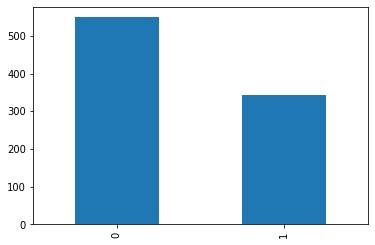

In [34]:
df = pd.read_csv("train.csv")
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Survived"].value_counts().plot.bar()
df["Fare"].fillna(df["Fare"].mean(), inplace=True)
# mapping features to numerical values
d1 = {"female": 0, "male": 1}
d2 = {"S": 0, "C": 1, "Q": 2}

# data resampling ?
df["Sex"] = df["Sex"].map(d1)
df["Embarked"] = df["Embarked"].map(d2)
#df.head()


mapping = {"Mr": 1, "Miss": 0, "Mrs": 1}
df["Married"] = df["Name"].str.extract("([A-Za-z]+)\.")
df["Married"] = df["Married"].map(mapping)
print(df["Married"].value_counts())
for i in range(len(df["Married"])):             # extracting married column from their names. Thanks to Jicheng Li
    if type(df["Married"][i]) == str:
        df["Married"][i] = 1                    # filling missing values with most common label?
df.head()

## Try Resampling and filling missing values

In [82]:
'''# original data
temp_df = df[df['Survived'] == 1]               # get 'dead' samples
other_df = df[df["Survived"] != 1]
temp_df_upsampled = resample(temp_df, n_samples=540, random_state=123, replace=True)
df = pd.concat([temp_df_upsampled, other_df])
df["Survived"].value_counts().plot.bar()
df'''

'# original data\ntemp_df = df[df[\'Survived\'] == 1]               # get \'dead\' samples\nother_df = df[df["Survived"] != 1]\ntemp_df_upsampled = resample(temp_df, n_samples=540, random_state=123, replace=True)\ndf = pd.concat([temp_df_upsampled, other_df])\ndf["Survived"].value_counts().plot.bar()\ndf'

In [35]:
extracted = df.drop(columns="PassengerId", axis=1).drop(columns="Name", axis=1).drop(columns="Cabin", axis=1).drop(columns="Ticket")
# find a way to deal with missing values: cut them off or take average value from its neighbors
extracted = extracted.dropna()
X = extracted.drop(columns="Survived", axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Married
0,3,1,22.000000,1,0,7.2500,0.0,1.0
1,1,0,38.000000,1,0,71.2833,1.0,1.0
2,3,0,26.000000,0,0,7.9250,0.0,0.0
3,1,0,35.000000,1,0,53.1000,0.0,1.0
4,3,1,35.000000,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...
885,3,0,39.000000,0,5,29.1250,2.0,1.0
887,1,0,19.000000,0,0,30.0000,0.0,0.0
888,3,0,29.699118,1,2,23.4500,0.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,1.0


In [36]:
Y = extracted["Survived"]
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 822, dtype: int64

In [85]:
'''# original data
df["Survived"].value_counts().plot.bar()
temp_df = df[df['Survived'] == 1]               # get 'dead' samples
other_df = df[df["Survived"] != 1]
temp_df_upsampled = resample(temp_df, random_state=123, replace=True)
df = pd.concat([temp_df_upsampled, other_df])
df'''

'# original data\ndf["Survived"].value_counts().plot.bar()\ntemp_df = df[df[\'Survived\'] == 1]               # get \'dead\' samples\nother_df = df[df["Survived"] != 1]\ntemp_df_upsampled = resample(temp_df, random_state=123, replace=True)\ndf = pd.concat([temp_df_upsampled, other_df])\ndf'

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# rescale data in trainnig stage (decrease sensitivity of the model)
sc = StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)


clf = MLPClassifier(hidden_layer_sizes=(6, 1), max_iter=1000, activation="relu", solver="adam")
clf.fit(trainX_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(6, 1), max_iter=1000)

In [59]:
y_pred = clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))
print(classification_report(y_pred, Y_test))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.94      0.85      0.90       121
           1       0.68      0.86      0.76        44

    accuracy                           0.85       165
   macro avg       0.81      0.86      0.83       165
weighted avg       0.87      0.85      0.86       165



c:\Users\18748\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\18748\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


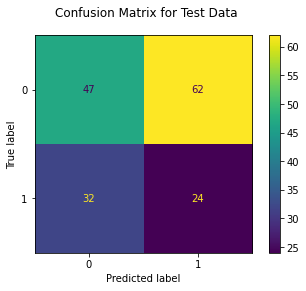

In [60]:
fig = plot_confusion_matrix(clf, X_test, Y_test, display_labels=clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Test Data")
plt.show()

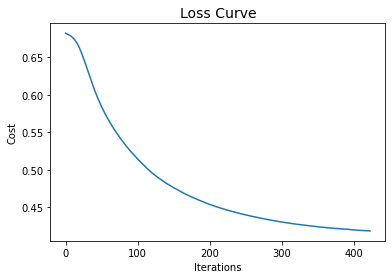

In [61]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()